In [2]:
from urllib import response
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

**WEBSCRAPPING A METACRITIC**

In [35]:
pages = []
page = 0
for x in range(100):
    pages.append(page)
    page += 2

links = []
for p in pages:
    url = f"https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?page={p}"
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = rq.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, "html.parser")

    juegos = soup.find_all("td", {"class": "clamp-summary-wrap"})
    for j in juegos:
        a = j.find("a", {"class": "title"})
        l = a["href"]
        link = (f"http://www.metacritic.com{l}")
        links.append(link)
    time.sleep(0.02)

WEBSCRAPPING TOTAL

In [36]:
nombres = []
ratings = []
plataforma = []
rating_user = []
developers = []
date = []
generos = []
resumen = []
clasificacion = []
players = []

for l in links:
    time.sleep(0.02)
    try:
        user_agent = {'User-agent': 'Mozilla/5.0'}
        response = rq.get(l, headers = user_agent)
        soup = BeautifulSoup(response.text, "html.parser")
        a = soup.find_all("div", {"class":"product_title"}) #NOMBRES
        for p in a:
            nombre = (p.find("a").text.strip())
            # nombres.append(p.find("a").text.strip())

        a = soup.find_all("a",{"class": "metascore_anchor"}) #RATINGS
        rating = (a[0].text.strip())
        # ratings.append(a[0].text.strip())

        a = soup.find_all("div", {"class":"product_title"})  #PLATAFORMA
        for p in a:
            plataform = (p.find("span").text.strip())
            # plataforma.append(p.find("span").text.strip())

        a = soup.find_all("a",{"class": "metascore_anchor"})  #RATINGS USERS
        rating_u = (a[1].text.strip())
        # rating_user.append(a[1].text.strip())

        a = soup.find_all("span",{"class": "data"})  #DEVELOPERS
        for p in a:
            developer = (p.find("a").text.strip())
            # developers.append(p.find("a").text.strip())
            break

        a = soup.find_all("li",{"class": "summary_detail release_data"}) #DATE
        for p in a:
            fecha = (p.find("span", {"class":"data"}).text)
            # date.append(p.find("span", {"class":"data"}).text)


        a = soup.find_all("li",{"class": "summary_detail product_genre"}) #GENEROS
        for p in a:
            genero = (p.find("span", {"class":"data"}).text)
            # generos.append(p.find("span", {"class":"data"}).text)


        a = soup.find_all("li",{"class": "summary_detail product_summary"})   #RESUMEN
        for p in a:
            if p.find("span", {"class":"blurb blurb_collapsed"}) == None:
                continue
            else:
                sinopsis = (p.find("span", {"class":"blurb blurb_collapsed"}).text.strip())
                # resumen[contador] = (p.find("span", {"class":"blurb blurb_collapsed"}).text.strip())

            
        for p in a:
            if p.find("span", {"class":"data"}) == None:
                continue
            else:
                sinopsis = (p.find("span", {"class":"data"}).text.strip())
                # resumen[contador] = (p.find("span", {"class":"data"}).text.strip())
        


        a = soup.find_all("li",{"class": "summary_detail product_rating"})     #CLASIFICACION
        for p in a:
            if p.find("span", {"class":"data"}) == None:
                continue
            else:
                restric = (p.find("span", {"class":"data"}).text)
                # clasificacion[contador] = (p.find("span", {"class":"data"}).text)
                

        a = soup.find_all("ul",{"class": "summary_details"})  #N_JUGADORES
        for p in a:
            b = p.find("li", {"class": "summary_detail product_players"})
            if b == None:
                continue
            else:
                c_players = ((b.text.split(":")[1].strip()))
                # players[contador] = ((b.text.split(":")[1].strip()))
        
        nombres.append(nombre)
        ratings.append(rating)
        plataforma.append(plataform)
        rating_user.append(rating_u)
        developers.append(developer)
        date.append(fecha)
        generos.append(genero)
        resumen.append(sinopsis)  ###
        clasificacion.append(restric)
        players.append(c_players)

        
    except:
        continue

    

In [48]:
df_games = pd.DataFrame()
df_games["Nombre"] = nombres
df_games["Rating_Meta"] = ratings
df_games["Rating_Usuarios"] = rating_user
df_games["Plataforma"] = plataforma
df_games["Developer"] = developers
df_games["Fecha"] = date
df_games["Genero"] = generos
df_games["Resumen"] = resumen
df_games["N_jugadores"] = players
df_games["Clasificacion"] = clasificacion
df_games

,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,99,9.1,Nintendo 64,Nintendo,"Nov 23, 1998",Action Adventure,"As a young boy, Link is tricked by Ganondorf, ...",1 Player,E
1,Tony Hawk's Pro Skater 2,98,7.4,PlayStation,Activision,"Sep 20, 2000",Sports,As most major publishers' development efforts ...,1-2,T
2,Grand Theft Auto IV,98,7.8,PlayStation 3,Rockstar Games,"Apr 29, 2008",Action Adventure,[Metacritic's 2008 PS3 Game of the Year; Also ...,1 Player,M
3,SoulCalibur,98,8.4,Dreamcast,Namco,"Sep 8, 1999",Action,"This is a tale of souls and swords, transcendi...",1-2,T
4,Grand Theft Auto IV,98,8.0,Xbox 360,Rockstar Games,"Apr 29, 2008",Action Adventure,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1 Player,M
...,...,...,...,...,...,...,...,...,...,...
9937,Vroom in the Night Sky,17,3.2,Switch,Poisoft,"Apr 5, 2017",Sports,Vroom in the night sky is a magical bike actio...,No Online Multiplayer,E
9938,Leisure Suit Larry: Box Office Bust,17,1.9,PlayStation 3,Funsta,"May 5, 2009",Action Adventure,The Leisure Suit Larry: Box Office Bust video ...,No Online Multiplayer,M
9939,Yaris,17,4.4,Xbox 360,Backbone Entertainment,"Oct 10, 2007",Driving,[Xbox Live Arcade] Hop into a Toyota Yaris an...,2 Online,E10+
9940,Ride to Hell: Retribution,16,1.4,PC,Deep Silver,"Jun 24, 2013",Driving,The game is set in the last years of the roari...,2 Online,M


Almacenamos los datos localmente:

In [ ]:
df_games.to_csv("datos_metacritic.csv", index=False)

**##################################################**

In [58]:
df_games = pd.read_csv("datos_metacritic.csv")
df_games

,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,99,9.1,Nintendo 64,Nintendo,"Nov 23, 1998",Action Adventure,"As a young boy, Link is tricked by Ganondorf, ...",1 Player,E
1,Tony Hawk's Pro Skater 2,98,7.4,PlayStation,Activision,"Sep 20, 2000",Sports,As most major publishers' development efforts ...,1-2,T
2,Grand Theft Auto IV,98,7.8,PlayStation 3,Rockstar Games,"Apr 29, 2008",Action Adventure,[Metacritic's 2008 PS3 Game of the Year; Also ...,1 Player,M
3,SoulCalibur,98,8.4,Dreamcast,Namco,"Sep 8, 1999",Action,"This is a tale of souls and swords, transcendi...",1-2,T
4,Grand Theft Auto IV,98,8.0,Xbox 360,Rockstar Games,"Apr 29, 2008",Action Adventure,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1 Player,M
...,...,...,...,...,...,...,...,...,...,...
9937,Vroom in the Night Sky,17,3.2,Switch,Poisoft,"Apr 5, 2017",Sports,Vroom in the night sky is a magical bike actio...,No Online Multiplayer,E
9938,Leisure Suit Larry: Box Office Bust,17,1.9,PlayStation 3,Funsta,"May 5, 2009",Action Adventure,The Leisure Suit Larry: Box Office Bust video ...,No Online Multiplayer,M
9939,Yaris,17,4.4,Xbox 360,Backbone Entertainment,"Oct 10, 2007",Driving,[Xbox Live Arcade] Hop into a Toyota Yaris an...,2 Online,E10+
9940,Ride to Hell: Retribution,16,1.4,PC,Deep Silver,"Jun 24, 2013",Driving,The game is set in the last years of the roari...,2 Online,M


In [20]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9942 entries, 0 to 9941
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nombre           9942 non-null   object
 1   Rating_Meta      9942 non-null   object
 2   Rating_Usuarios  9942 non-null   object
 3   Plataforma       9942 non-null   object
 4   Developer        9942 non-null   object
 5   Fecha            9942 non-null   object
 6   Genero           9942 non-null   object
 7   Resumen          9942 non-null   object
 8   N_jugadores      9936 non-null   object
 9   Clasificacion    9942 non-null   object
dtypes: object(10)
memory usage: 776.8+ KB


In [59]:
df_games = df_games[df_games["Fecha"]!= "TBA - Early Access"] #eliminamos valor erroneo de fecha
df_games = df_games[df_games["Rating_Meta"]!= 'tbd'] #Valores no utiles en el analisis
df_games = df_games[df_games["Rating_Usuarios"]!= 'tbd']

In [60]:
categorias = ["float", "float", "category", "category", "category", "category"]
columnas = ["Rating_Meta", "Rating_Usuarios", "N_jugadores",
            "Clasificacion", "Plataforma", "Genero"]

df_games["Fecha"] = pd.to_datetime(df_games["Fecha"])

n = 0
for col in columnas:
    try:
        df_games[col] = df_games[col].astype(categorias[n])  ####Arreglar errores
        n+=1
    except:
        print(col)
        continue

In [46]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9264 entries, 0 to 9941
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nombre           9264 non-null   object        
 1   Rating_Meta      9264 non-null   float64       
 2   Rating_Usuarios  9264 non-null   float64       
 3   Plataforma       9264 non-null   category      
 4   Developer        9264 non-null   object        
 5   Fecha            9264 non-null   datetime64[ns]
 6   Genero           9264 non-null   category      
 7   Resumen          9264 non-null   object        
 8   N_jugadores      9258 non-null   category      
 9   Clasificacion    9264 non-null   category      
dtypes: category(4), datetime64[ns](1), float64(2), object(3)
memory usage: 548.8+ KB


In [61]:
df_games

,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,99.0,9.1,Nintendo 64,Nintendo,1998-11-23,Action Adventure,"As a young boy, Link is tricked by Ganondorf, ...",1 Player,E
1,Tony Hawk's Pro Skater 2,98.0,7.4,PlayStation,Activision,2000-09-20,Sports,As most major publishers' development efforts ...,1-2,T
2,Grand Theft Auto IV,98.0,7.8,PlayStation 3,Rockstar Games,2008-04-29,Action Adventure,[Metacritic's 2008 PS3 Game of the Year; Also ...,1 Player,M
3,SoulCalibur,98.0,8.4,Dreamcast,Namco,1999-09-08,Action,"This is a tale of souls and swords, transcendi...",1-2,T
4,Grand Theft Auto IV,98.0,8.0,Xbox 360,Rockstar Games,2008-04-29,Action Adventure,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1 Player,M
...,...,...,...,...,...,...,...,...,...,...
9937,Vroom in the Night Sky,17.0,3.2,Switch,Poisoft,2017-04-05,Sports,Vroom in the night sky is a magical bike actio...,No Online Multiplayer,E
9938,Leisure Suit Larry: Box Office Bust,17.0,1.9,PlayStation 3,Funsta,2009-05-05,Action Adventure,The Leisure Suit Larry: Box Office Bust video ...,No Online Multiplayer,M
9939,Yaris,17.0,4.4,Xbox 360,Backbone Entertainment,2007-10-10,Driving,[Xbox Live Arcade] Hop into a Toyota Yaris an...,2 Online,E10+
9940,Ride to Hell: Retribution,16.0,1.4,PC,Deep Silver,2013-06-24,Driving,The game is set in the last years of the roari...,2 Online,M


A efectos de igualar la escala de rating entre "Rating_Meta y "Rating_usuarios" dividiremos "Rating_Meta" por 10

In [62]:
df_games["Rating_Meta"] = df_games["Rating_Meta"] / 10
df_games

,Nombre,Rating_Meta,Rating_Usuarios,Plataforma,Developer,Fecha,Genero,Resumen,N_jugadores,Clasificacion
0,The Legend of Zelda: Ocarina of Time,9.9,9.1,Nintendo 64,Nintendo,1998-11-23,Action Adventure,"As a young boy, Link is tricked by Ganondorf, ...",1 Player,E
1,Tony Hawk's Pro Skater 2,9.8,7.4,PlayStation,Activision,2000-09-20,Sports,As most major publishers' development efforts ...,1-2,T
2,Grand Theft Auto IV,9.8,7.8,PlayStation 3,Rockstar Games,2008-04-29,Action Adventure,[Metacritic's 2008 PS3 Game of the Year; Also ...,1 Player,M
3,SoulCalibur,9.8,8.4,Dreamcast,Namco,1999-09-08,Action,"This is a tale of souls and swords, transcendi...",1-2,T
4,Grand Theft Auto IV,9.8,8.0,Xbox 360,Rockstar Games,2008-04-29,Action Adventure,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1 Player,M
...,...,...,...,...,...,...,...,...,...,...
9937,Vroom in the Night Sky,1.7,3.2,Switch,Poisoft,2017-04-05,Sports,Vroom in the night sky is a magical bike actio...,No Online Multiplayer,E
9938,Leisure Suit Larry: Box Office Bust,1.7,1.9,PlayStation 3,Funsta,2009-05-05,Action Adventure,The Leisure Suit Larry: Box Office Bust video ...,No Online Multiplayer,M
9939,Yaris,1.7,4.4,Xbox 360,Backbone Entertainment,2007-10-10,Driving,[Xbox Live Arcade] Hop into a Toyota Yaris an...,2 Online,E10+
9940,Ride to Hell: Retribution,1.6,1.4,PC,Deep Silver,2013-06-24,Driving,The game is set in the last years of the roari...,2 Online,M


¿Como se diferencia el rating de criticos al rating dado por los usuarios?

<AxesSubplot:ylabel='Rating_Meta'>

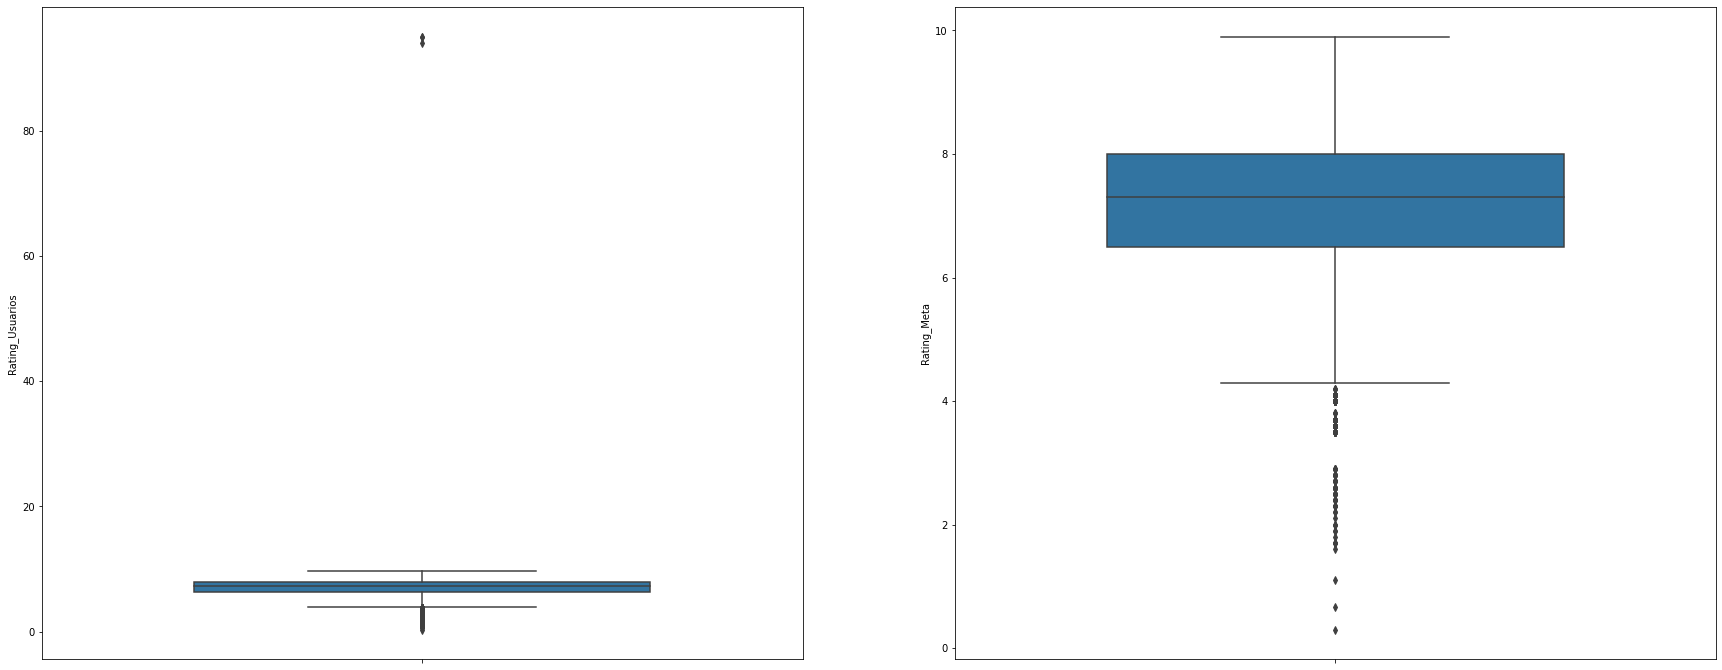

In [63]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(30,12))

sns.boxplot(data=df_games,y='Rating_Usuarios', width=0.6, ax=ax)
sns.boxplot(data=df_games,y='Rating_Meta', width=0.6, ax=ax2)

Hay valores muy grandes para tener sentido en "Rating_usuarios" (max calificacion usuarios = 10)

In [64]:
df_games = df_games[df_games["Rating_Usuarios"] <= 10]

<AxesSubplot:ylabel='Rating_Meta'>

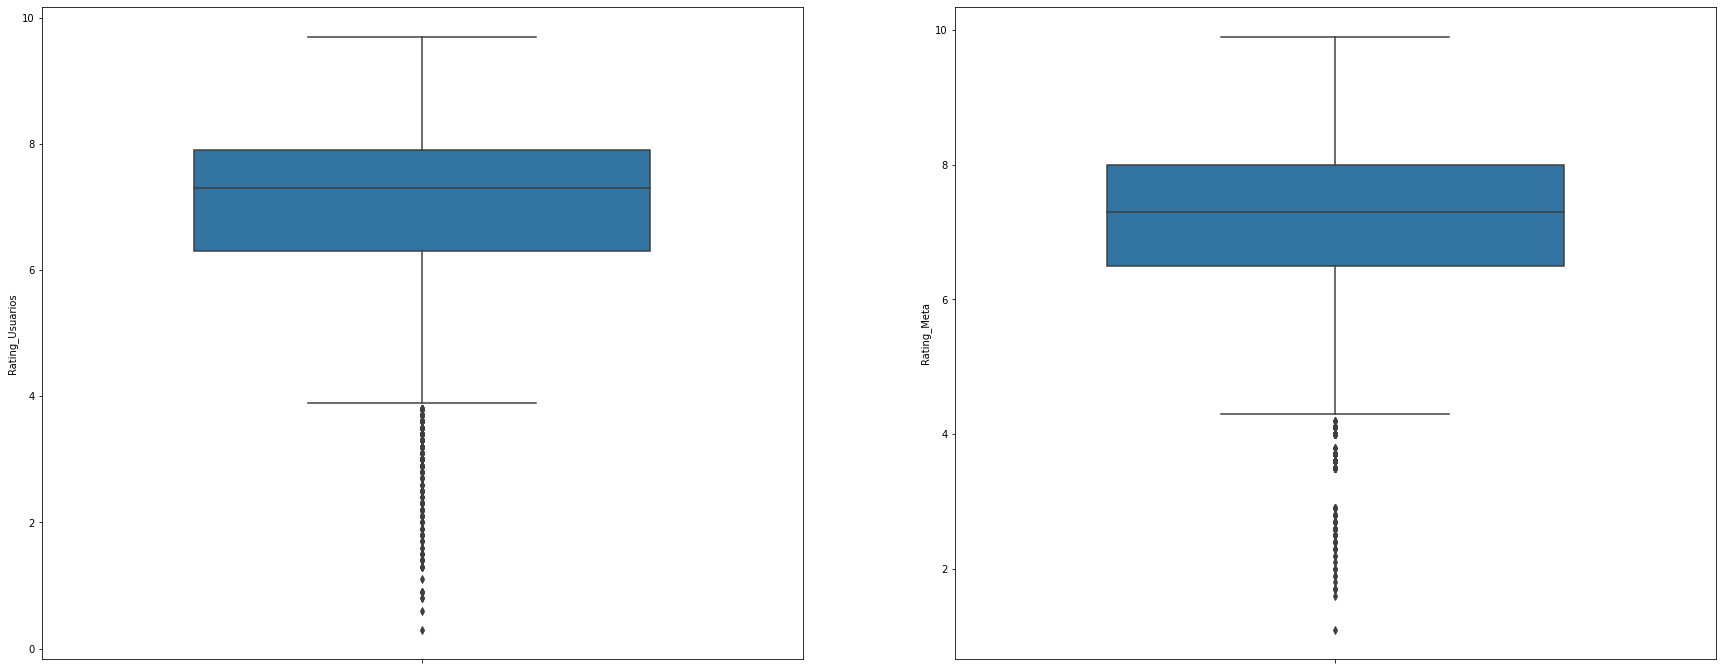

In [65]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(30,12))

sns.boxplot(data=df_games,y='Rating_Usuarios', width=0.6, ax=ax)
sns.boxplot(data=df_games,y='Rating_Meta', width=0.6, ax=ax2)

**CONCLUSIONES??**